In [19]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import math
from scipy.interpolate import CubicSpline

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Dana Inés Romero Bustos
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?











In [20]:
# Preparando la función

df_adelante_5 = lambda f,x,h : (-25 * f(x) + 48 * f(x + h) - 36 * f(x + 2 * h) + 16 * f(x + 3 * h) - 3 * f(x + 4 * h)) / (12 * h)
df_atras_5 = lambda f,x,h : (25 * f(x) - 48 * f(x - h) + 36 * f(x - 2 * h) - 16 * f(x - 3 * h) + 3 * f(x - 4 * h)) / (12 * h)
df_centrada_5 = lambda f,x,h : (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

def five_point_derivative(f , xlist , h):

  n = len(xlist)
  df = []

  for i in range(n):

    x = xlist[i]

    if i == 0:
       df.append(df_adelante_5(f, x, h))
    elif i == n-1:
      df.append(df_atras_5(f, x, h))
    else:
      df.append(df_centrada_5(f, x, h))

  return(df)

El error de la derivada es menor a medida que el valor de h tiende a 0


<ipython-input-22-3554859413>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


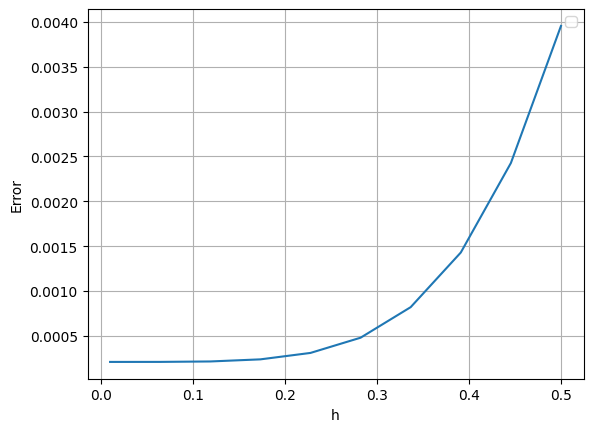

In [22]:
f = lambda x : np.cos(x)
df = lambda x: - np.sin(x)
df2 = lambda x: - np.cos(x)

x_vals = np.linspace(0 , 2 * np.pi , 10)
h_vals = np.linspace(0.01 , 0.5 , 10)
x_punto = np.pi / 8

# Inciso 1:

df_real = df(x_punto)

errores = []

for h in h_vals:

  df_puntos = five_point_derivative(f , x_vals , h)

  # Calculamos la derivada variando el h
  df_cubic = CubicSpline(x_vals , df_puntos , bc_type= 'natural')(x_punto)

  # Guardamos el valor del error para cada h
  errores.append(abs(df_cubic - df_real))

# Graficas
plt.plot(h_vals, errores)
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

print(f'El error de la derivada es menor a medida que el valor de h tiende a 0')

In [28]:
# Inciso 2:

df2_puntos = five_point_derivative(df , x_vals , 0.05)
df2_puntos_01 = five_point_derivative(df , x_vals , 0.01)
df2_real = df2(np.pi / 8)

df2_cubic = CubicSpline(x_vals , df2_puntos , bc_type= 'natural')(x_punto)
df2_cubic_01 = CubicSpline(x_vals , df2_puntos_01 , bc_type= 'natural')(x_punto)
error = abs(df2_real - df2_cubic)
error_01 = abs(df2_real - df2_cubic_01)

print(f'f^(2)(x)={df2_cubic}\nError = {error}')
print(f'Con un h menor, h = 0.1 \nf^(2)(x)={df2_cubic_01}\nError = {error_01}')

f^(2)(x)=-0.902027564354068
Error = 0.021851968157218793
Con un h menor, h = 0.1 
f^(2)(x)=-0.9020280981810175
Error = 0.02185143433026926


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [29]:
adelante = lambda f,x,h: (f(x + h) - f(x)) / h
atras = lambda f,x,h: (f(x) - f(x - h)) / h
centrada = lambda f,x,h: (f(x + h) - f(x - h)) / (2 * h)

# Segunda derivada centrada
centrada2 = lambda f,x,h: (f(x + h) - 2 * f(x) + f(x - h)) / h**2

# Diferencias finitas
def finita(f, xlist, h, orden=1):

  n = len(xlist)
  df = []

  for i in range(n):

    x = xlist[i]

    if orden ==1:

      if i == 0:
        df.append(adelante(f, x, h))
      elif i == n-1:
        df.append(atras(f, x, h))
      else:
        df.append(centrada(f, x, h))

    else:

      if i == 0 or i == n - 1:
        df.append(None)
      else:
        df.append(centrada2(f, x, h))

  return(df)

In [ ]:

f = lambda x : x * np.exp(x)
x_vals = np.linspace(1.8 , 2.2 , 6)
y_vals = f(x_vals)

# Valores de h
h_vals = np.linspace(0.01 , 0.1 , 10)

# Derivadas con numpy.gradient
df1_gradient = np.gradient(y_vals, x_vals)
df2_gradient = np.gradient(df1_gradient, x_vals)

# Aqui se guardaran los errores asociados a cada valor de h
errores_df1 = np.zeros(len(h_vals))
errores_df2 = np.zeros(len(h_vals))

# Contador para variar los indices en el array y agregar los errores
i = 0

for h in h_vals:

  # Calculo de las derivadas con el metodo de diferencias finitas
  df1 = finita(f , x_vals , h)
  df2 = finita(f , x_vals , h , orden= 2)
  df2 = np.array(df2 , dtype=float) # Se cambia a un array para evitar errores ya que en los extremos se tienen valores none

  # Calculo de errores
  error_df1 = max(abs(df1_gradient - df1))
  error_df2 = np.nanmax(abs(df2_gradient - df2))

  errores_df1[i] = error_df1
  errores_df2[i] = error_df2

  i += 1

# Grafica

plt.semilogy(h_vals, errores_df1 , label='Primera derivada')
plt.semilogy(h_vals, errores_df2, label='Segunda derivada')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

# Note que el h optimo corresponde a h = 0.08, ya que es el de menor error